In [1]:
import pandas as pd

In [2]:
airbnb = pd.read_csv("http://data.insideairbnb.com/australia/vic/melbourne/2022-09-09/visualisations/listings.csv")

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,365,0,NaN
1,1271310,Stunning Victorian 1 Brm Apartment,6919472,Jonathan,NaN,Port Phillip,-37.85876,144.98599,Entire home/apt,100,2,22,2020-01-18,0.28,1,0,0,NaN
2,603007,Spacious apartment near Botanic Gardens,2705870,Lindsay,NaN,Melbourne,-37.83022,144.98682,Private room,59,1,21,2020-06-25,0.47,1,0,0,NaN
3,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76606,144.97951,Private room,36,4,153,2022-08-09,1.30,1,210,8,NaN
4,607674,NaN,2558288,Alan,NaN,Yarra Ranges,-37.88388,145.36184,Entire home/apt,275,2,16,2022-09-03,0.15,2,362,3,NaN


In [4]:
airbnb["reviews_per_month"].mode()

0    0.02
Name: reviews_per_month, dtype: float64

In [5]:
mode = airbnb["reviews_per_month"].mode()[0]

In [6]:
airbnb["reviews_per_month"].fillna(mode, inplace = True)

In [7]:
airbnb.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             2
neighbourhood_group               18236
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3723
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           18236
dtype: int64

In [8]:
airbnb2= pd.get_dummies(airbnb,columns = ["room_type"],drop_first = True)

In [9]:
airbnb2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,60,1,4,2015-09-12,0.03,1,365,0,NaN,0,1,0
1,1271310,Stunning Victorian 1 Brm Apartment,6919472,Jonathan,NaN,Port Phillip,-37.85876,144.98599,100,2,22,2020-01-18,0.28,1,0,0,NaN,0,0,0
2,603007,Spacious apartment near Botanic Gardens,2705870,Lindsay,NaN,Melbourne,-37.83022,144.98682,59,1,21,2020-06-25,0.47,1,0,0,NaN,0,1,0
3,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76606,144.97951,36,4,153,2022-08-09,1.30,1,210,8,NaN,0,1,0
4,607674,NaN,2558288,Alan,NaN,Yarra Ranges,-37.88388,145.36184,275,2,16,2022-09-03,0.15,2,362,3,NaN,0,0,0


# Linear Regression

In [10]:
airbnb2.columns.get_loc("license")

16

In [11]:
y = airbnb2.iloc[:,8]
y

0          60
1         100
2          59
3          36
4         275
         ... 
18231     446
18232     255
18233     190
18234     255
18235    1400
Name: price, Length: 18236, dtype: int64

In [12]:
x = airbnb2.iloc[:,[6,7,9,10,12,14,15,17,18,19]]
x

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-37.77247,145.09232,1,4,0.03,365,0,0,1,0
1,-37.85876,144.98599,2,22,0.28,0,0,0,0,0
2,-37.83022,144.98682,1,21,0.47,0,0,0,1,0
3,-37.76606,144.97951,4,153,1.30,210,8,0,1,0
4,-37.88388,145.36184,2,16,0.15,362,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18231,-37.57250,145.64223,2,12,0.60,275,7,0,0,0
18232,-37.52927,145.33519,1,69,1.54,258,16,0,0,0
18233,-37.53405,145.35107,2,87,1.78,167,11,0,0,0
18234,-37.53035,145.33727,1,25,0.55,262,9,0,0,0


In [13]:
import statsmodels.api as sm

In [14]:
x_c = sm.add_constant(x)

In [15]:
reg = sm.OLS(y,x_c).fit()

In [16]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     21.32
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           5.12e-40
Time:                        00:24:01   Log-Likelihood:            -1.5009e+05
No. Observations:               18236   AIC:                         3.002e+05
Df Residuals:                   18225   BIC:                         3.003e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.14

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [18]:
vif_factor = [vif(x.values,i) for i in range(x.shape[1])]

In [19]:
pd.DataFrame({"Variable":x.columns,"VIF Factor":vif_factor})

,Variable,VIF Factor
0,latitude,211980.887486
1,longitude,212075.477454
2,minimum_nights,1.042327
3,number_of_reviews,2.193343
4,reviews_per_month,4.103132
5,availability_365,1.912648
6,number_of_reviews_ltm,4.046097
7,room_type_Hotel room,1.010806
8,room_type_Private room,1.493829
9,room_type_Shared room,1.025449


In [20]:
corrs = x.corr()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

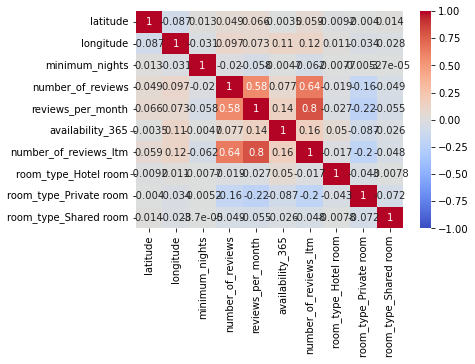

In [22]:
sns.heatmap(corrs,vmin = -1, vmax = 1, center = 0 , cmap = "coolwarm",annot = True)
plt.show()
plt.rcParams['figure.figsize'] = [15, 15]

"reviews_per_month" and "numbers_of_reviews" ,"reviews_per_month" and "number_of_reviews_Itm" , "numbers_of_reviews" and "number_of_reviews_Itm" is highly correlated, so I'll drop all except reviews_per_month

VIF Score of latitude and longitude is too high

In [37]:
x2 = airbnb2.iloc[:,[9,12,14,17,18,19]]
x2

,minimum_nights,reviews_per_month,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0.03,365,0,1,0
1,2,0.28,0,0,0,0
2,1,0.47,0,0,1,0
3,4,1.30,210,0,1,0
4,2,0.15,362,0,0,0
...,...,...,...,...,...,...
18231,2,0.60,275,0,0,0
18232,1,1.54,258,0,0,0
18233,2,1.78,167,0,0,0
18234,1,0.55,262,0,0,0


In [38]:
x2_c = sm.add_constant(x2)
reg2 = sm.OLS(y,x2_c).fit()

In [39]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.99
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.60e-40
Time:                        00:47:31   Log-Likelihood:            -1.5010e+05
No. Observations:               18236   AIC:                         3.002e+05
Df Residuals:                   18229   BIC:                         3.003e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    231

In [40]:
residual = reg.resid

In [41]:
sm.stats.het_breuschpagan(residual,x2)

(11.830291771904653,
 0.037188642149950865,
 1.972346088140613,
 0.06583431993813788)

In [42]:
reg3= sm.OLS(y,x2_c).fit(cov_type = "HC3")

In [43]:
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     89.87
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          1.41e-111
Time:                        00:47:33   Log-Likelihood:            -1.5010e+05
No. Observations:               18236   AIC:                         3.002e+05
Df Residuals:                   18229   BIC:                         3.003e+05
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    231

1 minimum_nights, price would be increased by 0.9993

1 review per month , price would be decreased by 18.9171

If room type is Hotel room , price of it would be decreased by 25.8504 compared to entire home of apt.

If room type is Private room, price of it would be decreased by 146.3731 compared to entire home of apt.

If roome type is shared room, price of it would be decreased by 172.5397 compared to entire home of apt.